In [1]:
# 분석
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train_features.csv')
train_label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
print(train.shape)
print(train.info())
print(train.head())

(1875000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB
None
   id  time     acc_x     acc_y     acc_z      gy_x       gy_y       gy_z
0   0     0  1.206087 -0.179371 -0.148447 -0.591608 -30.549010 -31.676112
1   0     1  1.287696 -0.198974 -0.182444  0.303100 -39.139103 -24.927216
2   0     2  1.304609 -0.195114 -0.253382 -3.617278 -44.122565 -25.019629
3   0     3  1.293095 -0.230366 -0.215210  2.712986 -53.597843 -27.454013
4   0     4  1.300887 -0.187757 -0.222523  4.286707 -57.906561 -27.961234


In [4]:
print(np.sum(np.isnan(train)))

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64


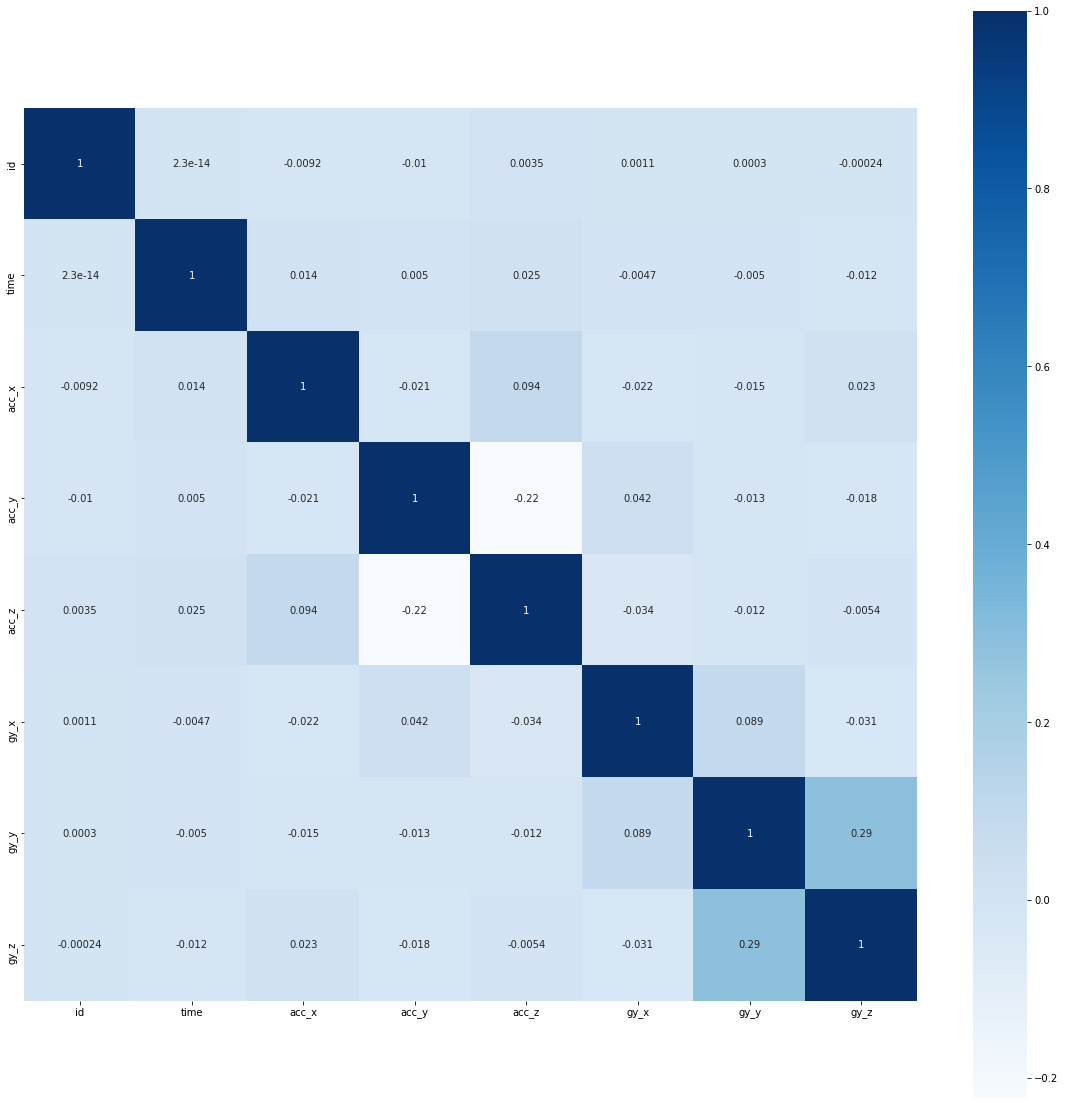

In [5]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(), annot=True, square=True, cmap = "Blues")

In [5]:
train.shape, train_label.shape, test.shape, submission.shape

((1875000, 8), (3125, 3), (469200, 8), (782, 62))

In [6]:
train[['id', 'time']].groupby('id').count()

,time
id,
0,600
1,600
2,600
3,600
4,600
...,...
3120,600
3121,600
3122,600


### 3125개의 ID 600time  -> 1,875,000

In [7]:
test[['id', 'time']].groupby('id').count()['time'].unique()

array([600], dtype=int64)

In [8]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']

In [9]:
df = train[features].groupby('id')
df.head()

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1874400,3124,-0.862090,-0.448951,0.325390,17.735992,-87.798082,-64.138319
1874401,3124,-0.840665,-0.491719,0.362417,11.027550,-92.245611,-66.637434
1874402,3124,-0.817442,-0.528205,0.385158,7.754232,-96.420087,-69.106258
1874403,3124,-0.792708,-0.558292,0.390222,5.103146,-101.871034,-71.446932


     id  time     acc_x     acc_y     acc_z       gy_x       gy_y       gy_z
0     0     0  1.206087 -0.179371 -0.148447  -0.591608 -30.549010 -31.676112
1     0     1  1.287696 -0.198974 -0.182444   0.303100 -39.139103 -24.927216
2     0     2  1.304609 -0.195114 -0.253382  -3.617278 -44.122565 -25.019629
3     0     3  1.293095 -0.230366 -0.215210   2.712986 -53.597843 -27.454013
4     0     4  1.300887 -0.187757 -0.222523   4.286707 -57.906561 -27.961234
..   ..   ...       ...       ...       ...        ...        ...        ...
595   0   595  0.985242 -0.326122 -0.354528 -14.903280  20.172339  22.973018
596   0   596  1.052837 -0.220710 -0.413472 -10.857025  19.786856  23.174597
597   0   597  1.025643 -0.227845 -0.354516  -2.334243  25.768654  18.932070
598   0   598  1.031553 -0.387862 -0.277857  -9.710746  28.697694  20.631577
599   0   599  1.138159 -0.426846 -0.430263 -15.891015  21.675950  32.123007

[600 rows x 8 columns]


<AxesSubplot:>

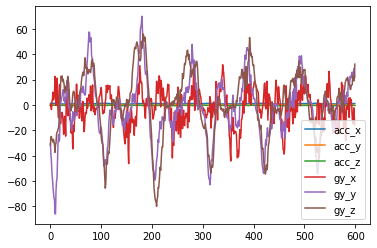

In [10]:
# id = 0의 600개 자료를 가지고 어떤 움직이이 있는지 그래프로 확인
ex=train[train['id']==0]
print(ex)
ex.iloc[:,2:].plot()

In [11]:
print(train[features],test[features])
X_train = train[features]
X_test = test[features]

           id     acc_x     acc_y     acc_z       gy_x        gy_y       gy_z
0           0  1.206087 -0.179371 -0.148447  -0.591608  -30.549010 -31.676112
1           0  1.287696 -0.198974 -0.182444   0.303100  -39.139103 -24.927216
2           0  1.304609 -0.195114 -0.253382  -3.617278  -44.122565 -25.019629
3           0  1.293095 -0.230366 -0.215210   2.712986  -53.597843 -27.454013
4           0  1.300887 -0.187757 -0.222523   4.286707  -57.906561 -27.961234
...       ...       ...       ...       ...        ...         ...        ...
1874995  3124 -0.712530 -0.658357  0.293707 -29.367857 -104.013664 -76.290437
1874996  3124 -0.683037 -0.658466  0.329223 -30.149089 -101.796809 -76.625087
1874997  3124 -0.664730 -0.666625  0.364114 -27.873095  -98.776072 -79.365125
1874998  3124 -0.630534 -0.682565  0.373696 -23.636550  -99.139495 -80.259478
1874999  3124 -0.578351 -0.700235  0.384390 -17.917626 -100.181873 -80.676229

[1875000 rows x 7 columns]           id     acc_x     acc_y    

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,  columns = features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,  columns = features)
print(X_train)

               id     acc_x     acc_y     acc_z      gy_x      gy_y      gy_z
0       -1.731497  2.307314 -0.029939 -0.432104  0.011776 -0.410859 -0.461007
1       -1.731497  2.421086 -0.063321 -0.504058  0.026484 -0.528052 -0.365459
2       -1.731497  2.444664 -0.056749 -0.654199 -0.037962 -0.596041 -0.366767
3       -1.731497  2.428612 -0.116782 -0.573407  0.066099 -0.725311 -0.401232
4       -1.731497  2.439475 -0.044220 -0.588886  0.091969 -0.784094 -0.408413
...           ...       ...       ...       ...       ...       ...       ...
1874995  1.731497 -0.367432 -0.845648  0.503707 -0.461266 -1.413128 -1.092639
1874996  1.731497 -0.326315 -0.845833  0.578875 -0.474109 -1.382884 -1.097377
1874997  1.731497 -0.300794 -0.859728  0.652722 -0.436694 -1.341672 -1.136169
1874998  1.731497 -0.253120 -0.886873  0.673002 -0.367051 -1.346630 -1.148831
1874999  1.731497 -0.180373 -0.916966  0.695634 -0.273040 -1.360851 -1.154731

[1875000 rows x 7 columns]


In [13]:
X_train = X_train.groupby('id').agg(['max', 'min', 'mean'])
print(X_train)
X_test = X_test.groupby('id').agg(['max', 'min', 'mean'])
print(X_test)

              acc_x                         acc_y                      \
                max       min      mean       max       min      mean   
id                                                                      
-1.731497  2.499952  1.451132  1.924274  0.576740 -0.787331 -0.096525   
-1.730388  2.346256 -2.380065 -0.442783  1.467734 -1.930864 -0.264758   
-1.729280  2.326481 -0.967338  0.681443  1.383572 -0.901221  0.135198   
-1.728171 -0.241572 -1.350582 -0.611639  0.758704 -0.645495  0.126232   
-1.727063  1.461978 -2.760516 -0.292831  3.212820 -3.224250 -0.298493   
...             ...       ...       ...       ...       ...       ...   
 1.727063  1.170719 -1.639105  0.207044  0.561751 -1.920066 -0.864129   
 1.728171  0.003232 -1.570436 -0.732363  0.476424 -0.762858 -0.121902   
 1.729280  1.664047 -2.969444 -0.927465  2.435158 -3.192863 -0.341288   
 1.730388  1.902690 -0.669398  0.470698  2.785276  0.739435  1.774779   
 1.731497  1.377061 -0.787451  0.020800 -0.053568 -

In [14]:
y_train = train_label['label']

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=0, min_samples_leaf=30)

In [19]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_jobs=-1, random_state=0)

In [20]:
y_pred = rf_model.predict_proba(X_test)
y_pred

array([[0.        , 0.00015625, 0.00344061, ..., 0.10000292, 0.        ,
        0.03431045],
       [0.00491494, 0.0011593 , 0.00221713, ..., 0.00091327, 0.0014331 ,
        0.00442951],
       [0.00712413, 0.09286007, 0.00504863, ..., 0.00079372, 0.0395448 ,
        0.00936017],
       ...,
       [0.0047054 , 0.00089552, 0.00036129, ..., 0.        , 0.00014286,
        0.0051022 ],
       [0.0001087 , 0.00600663, 0.0057166 , ..., 0.00077922, 0.        ,
        0.00297947],
       [0.00322356, 0.        , 0.00144044, ..., 0.        , 0.        ,
        0.00282972]])

-------------------

In [69]:
submission.iloc[:,1:] = y_pred
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000000,0.000000,0.006636,0.002021,0.001573,0.000000,0.000000,0.002220,0.000632,...,0.026538,0.002992,0.024069,0.000572,0.004579,0.000120,0.008090,0.100802,0.000000,0.039735
1,3126,0.004026,0.000000,0.001512,0.004516,0.002706,0.004393,0.000000,0.001301,0.000233,...,0.002974,0.000000,0.004111,0.000000,0.003421,0.000530,0.008997,0.000361,0.000125,0.002346
2,3127,0.007942,0.088471,0.007692,0.006524,0.000339,0.017733,0.035840,0.035153,0.011807,...,0.000152,0.000000,0.000297,0.039895,0.009900,0.145834,0.000451,0.000000,0.038112,0.005740
3,3128,0.008565,0.008216,0.017703,0.006527,0.000000,0.010184,0.000816,0.020401,0.003883,...,0.000351,0.000000,0.000119,0.002947,0.019726,0.004208,0.013885,0.000895,0.000000,0.030527
4,3129,0.004784,0.000000,0.000000,0.000000,0.001086,0.002682,0.000000,0.000000,0.001502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000484,0.000377,0.000000,0.000088,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.002814,0.000100,0.000000,0.003047,0.061467,0.043321,0.000000,0.004464,0.001107,...,0.001942,0.000115,0.002948,0.000000,0.000000,0.008195,0.001573,0.000115,0.010444,0.001546
778,3903,0.002919,0.000000,0.000000,0.000423,0.003323,0.003228,0.000145,0.001092,0.001278,...,0.000000,0.000256,0.000314,0.000000,0.000108,0.001938,0.001933,0.000000,0.001178,0.000303
779,3904,0.006506,0.000000,0.000233,0.003088,0.000399,0.000222,0.000000,0.000000,0.001473,...,0.000000,0.000000,0.000000,0.000000,0.001260,0.000000,0.003703,0.000000,0.000000,0.002840
780,3905,0.000550,0.005271,0.001914,0.003031,0.000000,0.000300,0.197280,0.001860,0.004337,...,0.000000,0.000105,0.000000,0.019511,0.002840,0.001760,0.000000,0.000000,0.000119,0.000000


In [70]:
submission.to_csv('baseline_rf.csv', index=False)